In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import MatrixMethods as mtrx

# מעבדה 1 - נתונים סינטטיים

מטרת המעבדה היא לבדוק השפעה של פרמטרי מצלמה ויחסים הדדיים בין זוג מצלמות על התמונות הנרכשות והמודל המשוחזר.

- *במהלך המעבדה נשתמש בקודים מפוטוגרמטריה 1*
- *ניתן לכתוב את הפונקציות ב-Pycharm ולייבא אותן ל-Jupyter במקרה הצורך*

In [2]:

import ImagePair


## חלק א' - Setup

###  בניית עולם וירטואלי

נתחיל מבניית אובייקט שממדיו ומיקומו בעולם ידועים. 



1. צרו מודול בשם ObjectsSynthetic.
2. הוסיפו למודול פונקציה המקבלת ממדים של קוביה ומחזירה את קואורדינטות הקודקודים שלה. הניחו כי מרכז הקוביה נמצא בראשית הצירים (של העולם). 

In [3]:
import ObjectsSynthetic as objs

# the following method reutrns 8 cube corners
corners = objs.cubeCorners(0.1)
print (corners)

hi
[[ 0.05 -0.05  0.05]
 [-0.05 -0.05  0.05]
 [-0.05  0.05  0.05]
 [ 0.05  0.05  0.05]
 [ 0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05]
 [-0.05  0.05 -0.05]
 [ 0.05  0.05 -0.05]]


3. במחלקה PhotoViewer  מפוטוגרמטריה 1 הוסיפו פונקציה 
 המקבלת שמונה פינות של קוביה ומציירת אותה על-ידי חיבור קווים בין הנקודות. 

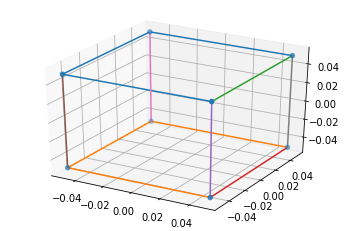

In [4]:
import PhotoViewer as pv 

fig_orthographic = plt.figure()
ax = fig_orthographic.add_subplot(111, projection='3d')

pv.drawCube(corners,ax)

### בניית מצלמה וירטואלית

השתמשו במחלקה Camera בה השתמשתם בפוטוגרמטריה 1. 
    
א. הוסיפו מאפיין שנקרא sensorSize.  מאפיין זה יתאר את גודל החיישן.
    
     
    

ב. הוסיפו פונקציה למחלקה המחזירה את פינות התצלום במערכת מצלמה. 
    
- שימו לב, הנקודה הראשית נמצאת (באופן אידיאלי) במרכז החיישן. 
    

In [5]:
from Camera import *
newCamera = Camera(-35, np.array([15,15]), None, None, None, 30)

sysCorners = newCamera.cameraSysCorners()
print(sysCorners)


[[ 15. -15.  35.]
 [-15. -15.  35.]
 [-15.  15.  35.]
 [ 15.  15.  35.]]


### בניית התצלום

השתמשו במחלקה SingleImage בה השתמשתם בפוטוגרמטריה 1. 

א. הוסיפו פונקציה המחשבת את חתימת התצלום בעולם. 

ב. הוסיפו פונקציית
setter למאפיין של האוריינטציה החיצונית, בעזרתה ניתן להגדיר את האוריינטציה החיצונית של התצלום.

In [6]:
import SingleImage

## חלק ב' - ניתוח השפעת פרמטרי ואוריינטציית מצלמה על התמונה הנרכשת

1. איך משפיע אורך המוקד על התמונה המתקבלת? האם היא מעוותת יותר ככל שאורך המוקד גדל? האם פחות?
2. איך ישפיע המרחק של האובייקט מהמצלמה?
3. מה יקרה במצב בו גם אורך המוקד גדול וגם האובייקט רחוק מאוד מהמצלמה?
4. איך ישפיע סיבוב ב $\kappa$ על התמונה המתקבלת?
5. איך ישפיע סיבוב ב-$\varphi$ על התמונה המתקבלת?
6. איך ישפיע סיבוב גם סביב ציר X וגם סביב ציר Y של המצלמה על התמונה המתקבלת?

### בניית הנתונים הסינטטיים

1. בנו קוביה בעלת מימדים כלשהם וציירו אותה בתלת-מימד.

In [7]:
# Code for cube creation

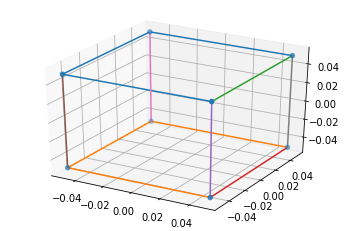

In [8]:
# Code for drawing
fig_orthographic = plt.figure()
ax = fig_orthographic.add_subplot(111, projection='3d')


pv.drawCube(corners,ax)

2. הגדירו מצלמה בעלת אורך מוקד וגודל חיישן סטנדרטיים (חפשו באינטרנט מהם הפרמטרים הסטנדרטיים עבור עדשות של מצלמות DSLR)

In [9]:
f = 35 # milimeters
sensorSize = 30 # milimeters

3.  הגדירו תצלום אנכי שצולם עם המצלמה לעיל ונמצא מעל ראשית הצירים בעולם, ובגובה כלשהו (למשל, 10 מ')

In [14]:
img1 = SingleImage.SingleImage(newCamera)
camera_xyz = [0,0,0.4]
extOri = np.array([*camera_xyz, 0, (np.pi/2), 0]) #Possible bug no 'f' 7th param
img1.exteriorOrientationParameters = extOri

4.  ציירו את המצלמה, עם מישור התצלום, והקוביה באותו איור. ודאו שכל הקוביה מצולמת ושכקנה המידה הגיוני וניתן לעבודה. אם לא, שנו את הפרמטרים עד שתתקבל תוצאה הגיונית.  

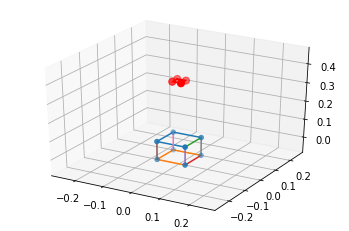

In [15]:
fig_orthographic = plt.figure()
ax = fig_orthographic.add_subplot(111, projection='3d')
ax.auto_scale_xyz([-0.25, 0.25], [-0.25, 0.25], [-0.05, 0.45])
pv.set_aspect_equal_3d(ax)


pv.drawCube(corners,ax)
pv.drawImageFrame(0.03, 0.03, mtrx.Compute3DRotationMatrix(0, 0, 0), np.array([[0],[0],[0.4]]), -0.035, 1, ax)
#plt.show()

5. ציירו את ההטלה של הקוביה על התצלום.

[[ 0.005 -0.005  0.365]
 [-0.005 -0.005  0.365]
 [-0.005  0.005  0.365]
 [ 0.005  0.005  0.365]]


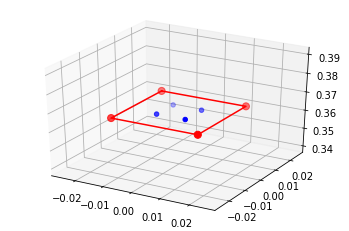

In [31]:
def draw_frame_and_points(z_of_prspc,f,camera_xyz):
    #params in meters
    fig_orthographic = plt.figure()
    ax = fig_orthographic.add_subplot(111, projection='3d')
    ax.auto_scale_xyz([-0.025, 0.025], [-0.025, 0.025], [z_of_prspc-f-0.025, z_of_prspc-f+0.025]) # Limits to graph for equal aspect
    pv.set_aspect_equal_3d(ax) # equal aspect

    from MatrixMethods import LinePlaneCollision as lpc #calculatin intersection

    # Definning plane
    planeNormal = np.array([0, 0, 1]) # img plane
    planePoint = np.array([0, 0, z_of_prspc-f])  # center of the image

    # Definning ray
    rayDirection = corners[0:4,:] - np.array([camera_xyz]*4) # Vectors of real world points from persective point
    rayPoint = np.array([0, 0, z_of_prspc])  # perspective

    intrsect_points =np.zeros(rayDirection.shape)
    for i in range(rayDirection.shape[0]):
        intrsect_points[i,:] = lpc(planeNormal, planePoint, rayDirection[i,:], rayPoint)

    print(intrsect_points)

    pv.drawImageFrame(0.03, 0.03, mtrx.Compute3DRotationMatrix(0, 0, 0), np.array([[0],[0],[z_of_prspc]]), -f, 1, ax)
    pv.drawPoints(intrsect_points,ax)
    return ax
    
draw_frame_and_points(0.4,0.035,[0,0,0.4])

6. שנו את הפרמטרים כך שתוכלו לענות על השאלות בתחילת הפרק. 

*הראו את הניסויים השונים שאתם עושים על מנת להגיע למסקנות הוסיפו כמה שורות קוד שתרצו*

1. איך משפיע אורך המוקד על התמונה המתקבלת? האם היא מעוותת יותר ככל שאורך המוקד גדל? האם פחות?


[[ 0.00285714 -0.00285714  0.38      ]
 [-0.00285714 -0.00285714  0.38      ]
 [-0.00285714  0.00285714  0.38      ]
 [ 0.00285714  0.00285714  0.38      ]]
[[ 0.005 -0.005  0.365]
 [-0.005 -0.005  0.365]
 [-0.005  0.005  0.365]
 [ 0.005  0.005  0.365]]
[[ 0.01214286 -0.01214286  0.315     ]
 [-0.01214286 -0.01214286  0.315     ]
 [-0.01214286  0.01214286  0.315     ]
 [ 0.01214286  0.01214286  0.315     ]]


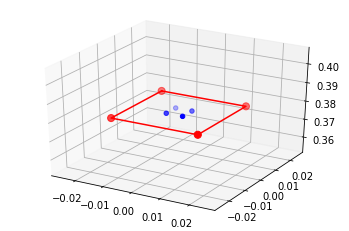

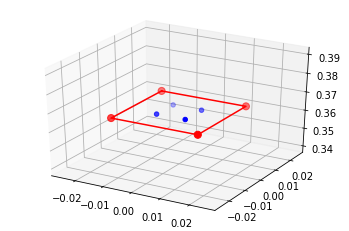

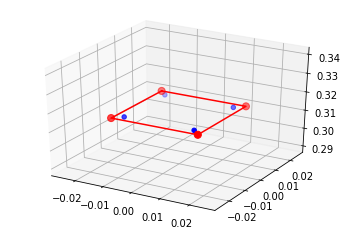

In [32]:
draw_frame_and_points(0.4,0.020,[0,0,0.4])
draw_frame_and_points(0.4,0.035,[0,0,0.4])
draw_frame_and_points(0.4,0.085,[0,0,0.4])

2. איך ישפיע המרחק של האובייקט מהמצלמה? 

[[ 0.01166667 -0.01166667  0.165     ]
 [-0.01166667 -0.01166667  0.165     ]
 [-0.01166667  0.01166667  0.165     ]
 [ 0.01166667  0.01166667  0.165     ]]
[[ 0.005 -0.005  0.365]
 [-0.005 -0.005  0.365]
 [-0.005  0.005  0.365]
 [ 0.005  0.005  0.365]]
[[ 0.00318182 -0.00318182  0.565     ]
 [-0.00318182 -0.00318182  0.565     ]
 [-0.00318182  0.00318182  0.565     ]
 [ 0.00318182  0.00318182  0.565     ]]


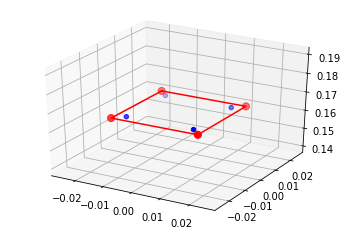

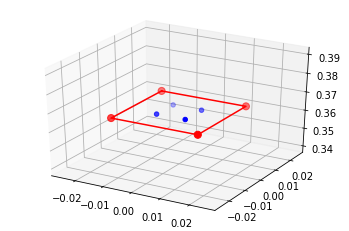

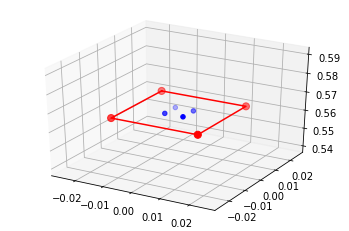

In [34]:
draw_frame_and_points(0.2,0.035,[0,0,0.2])
draw_frame_and_points(0.4,0.035,[0,0,0.4])
draw_frame_and_points(0.6,.035,[0,0,0.6])

3. מה יקרה במצב בו גם אורך המוקד גדול וגם האובייקט רחוק מאוד מהמצלמה?


[[ 0.00666667 -0.00666667  0.18      ]
 [-0.00666667 -0.00666667  0.18      ]
 [-0.00666667  0.00666667  0.18      ]
 [ 0.00666667  0.00666667  0.18      ]]
[[ 0.00772727 -0.00772727  0.515     ]
 [-0.00772727 -0.00772727  0.515     ]
 [-0.00772727  0.00772727  0.515     ]
 [ 0.00772727  0.00772727  0.515     ]]


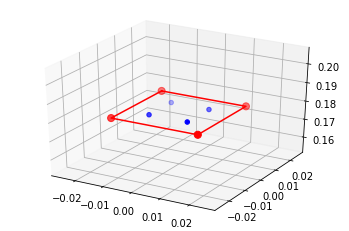

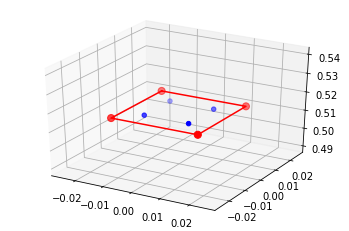

In [35]:
draw_frame_and_points(0.2,0.020,[0,0,0.2]) # One with one combined
draw_frame_and_points(0.6,0.085,[0,0,0.6]) # 3rd with 3rd combined

In [ ]:
# they act opposite to each other

4. איך ישפיע סיבוב ב $\kappa$ על התמונה המתקבלת?

In [ ]:
# Not much

5. איך ישפיע סיבוב ב-$\varphi$ על התמונה המתקבלת?

In [ ]:
# Some of the function need to be rewriten since they don't care about rotation

6. איך ישפיע סיבוב גם סביב ציר X וגם סביב ציר Y של המצלמה על התמונה המתקבלת?

In [ ]:
# Some of the function need to be rewriten since they don't care about rotation

## חלק ג' - השפעת קונפיגורציית תצלומים על שחזור מודל

1. כיצד ישתנה דיוק המודל המשוחזר בשינוי גודל הבסיס?
2. כיצד ישתנה דיוק המודל המשוחזר אם תמונה אחת מסובבת? האם יהיה הבדל בין סיבוב של תמונה אחת לעומת השניה? 
3. כיצד ישפיע רעש מדידה של נקודות בעולם על שחזור המודל? 
4. כיצד ישפיע רעש מדידה של נקודות בתצלום על שחזור המודל?

### בניית הנתונים הסינטטיים

השתמשו בקוביה, במצלמה ובתצלום שבניתם בפרק הקודם.

1. הגדירו מצלמה שניה בעלת אורך מוקד וגודל חיישן דומים למצלמה הראשונה 

2.  הגדירו תצלום אנכי שצולם עם המצלמה השניה ונמצא במרחק כלשהו מהמצלמה הראשונה בעולם ובאותו הגובה.

4.  ציירו את המצלמות, עם מישורי התצלום, והקוביה באותו איור. ודאו שכל הקוביה מצולמת בשני התצלומים ושכקנה המידה הגיוני וניתן לעבודה. אם לא, שנו את הפרמטרים עד שתתקבל תוצאה הגיונית.  

5. ציירו את ההטלה של הקוביה על כל אחד מהתצלומים.

6. בצעו חיתוך קדימה והשוו את הקואורידנטות המתקבלות עבור הקוביה בעולם עם הקואורדינטות האמיתיות שלה (אלו שאתם בחרתם). 

7. שנו את הפרמטרים כך שתוכלו לענות על השאלות בתחילת הפרק. 

*הראו את הניסויים השונים שאתם עושים על מנת להגיע למסקנות הוסיפו כמה שורות קוד שתרצו*

1. כיצד ישתנה דיוק המודל המשוחזר בשינוי גודל הבסיס?


2. כיצד ישתנה דיוק המודל המשוחזר אם תמונה אחת מסובבת? האם יהיה הבדל בין סיבוב של תמונה אחת לעומת השניה? 


3. כיצד ישפיע רעש מדידה של נקודות בעולם על שחזור המודל? 

4. כיצד ישפיע רעש מדידה של נקודות בתצלום על שחזור המודל?